# &nbsp; Supervised ML: Predicting housing prices (Phase2: Regression)
- Iteration 6: predicting the exact price

## 1.&nbsp; Data reading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import set_config

In [2]:
# 0. Set the config so that we can view our preprocessor, and to transform output from numpy arrays to pandas dataframes
set_config(display="diagram")
set_config(transform_output="pandas")

In [3]:
# reading: housing_iteration_6_regression
url = "https://drive.google.com/file/d/1mOYOiWuqCybgAsb4l9pJONJKVBcyDFu-/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

housing_data = pd.read_csv(path)

In [4]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)
# To display all rows as well
pd.set_option('display.max_rows', None)

In [5]:
housing_data.shape

(1460, 81)

In [6]:
housing_data.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
316,317,60,RL,94.0,13005,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7,7,1980,1980,Gable,CompShg,CemntBd,CmentBd,BrkFace,278.0,Gd,TA,CBlock,Gd,TA,No,GLQ,692,Unf,0,153,845,GasA,TA,Y,SBrkr,1153,1200,0,2353,1,0,2,1,4,1,Ex,10,Typ,1,TA,Attchd,1983.0,RFn,2,484,TA,TA,Y,288,195,0,0,0,0,NaN,GdPrv,NaN,0,8,2009,WD,Normal,260000
1392,1393,85,RL,68.0,7838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SFoyer,5,5,1967,1967,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,769,Unf,0,95,864,GasA,TA,Y,SBrkr,900,0,0,900,1,0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1967.0,RFn,1,288,TA,TA,Y,175,144,0,0,0,0,NaN,MnWw,NaN,0,12,2006,WD,Normal,123000
370,371,60,RL,NaN,8121,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,711,0,1664,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2000.0,RFn,2,460,TA,TA,Y,100,40,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal,172400


In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2.&nbsp; Creating a dummy model

Prior experience leads me to believe that the living area of a house can influence its price. Let's look at the relationship between the living area and price columns to see if that's true.

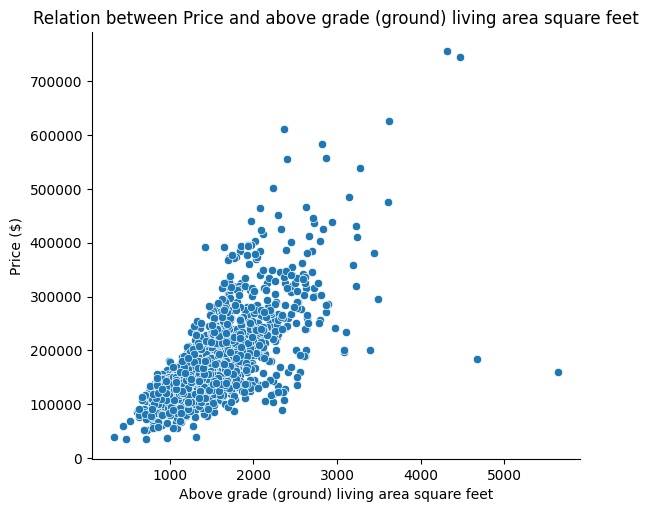

In [9]:
(
  sns.relplot(data=housing_data,
              x='GrLivArea',
              y='SalePrice',
              height=5,
              aspect=1.2)
  .set(title='Relation between Price and above grade (ground) living area square feet')
  .set_axis_labels('Above grade (ground) living area square feet', 'Price ($)')
);

In [10]:
housing_data[['GrLivArea','SalePrice']].corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


Looking at our plot of the relationship between living area and price, we can come up with a simple dummy model based on a linear relationship between the two variables. For example, we can assume that the price of a house is roughly 140 times its living area. This would give us a simple model like:

`price = living area * 140`

Let's plot a line on the chart to see how living area * 140 would look

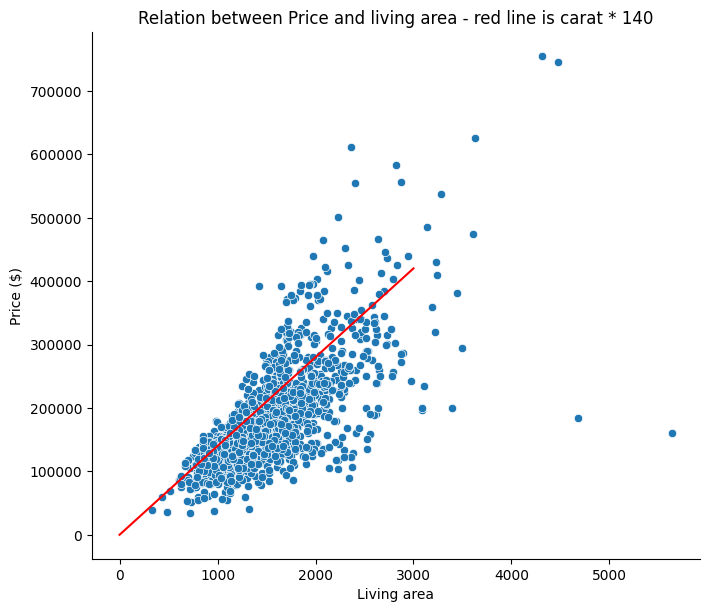

In [11]:
(
  sns.relplot(data=housing_data,
              x='GrLivArea',
              y='SalePrice',
              height=6,
              aspect=1.2)
  .set(title='Relation between Price and living area - red line is carat * 140')
  .set_axis_labels('Living area', 'Price ($)')
)
plt.plot([0, 3000], [0, 420000], 'r-')
plt.show();

This appears to be a decent fit for our dummy model. However, assessing its performance becomes a different challenge compared to classification tasks. In classification, we can easily determine how well our model performs by checking if it correctly predicts the categories. But with regression, where our predictions involve continuous values like prices, they don't fall into distinct categories. Hence, we must employ alternative techniques to evaluate the effectiveness of our regression model.

First, let's create our dummy model as a function so we can use it.

In [12]:
def dummy_model(Living_area):
    return Living_area * 140

We aim to test our dummy model against SKLearns models, so lets perform a train test split. We'll compare all of the models on how well they perform on the test data.

In [13]:
#housing_data = housing_data.set_index("Id")
# X and y creation
X = housing_data.copy()
#.drop(columns=["Alley", "MasVnrType", "PoolQC", "Fence", "MiscFeature"])
y = X.pop("SalePrice")

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=123)

Now let's make predictions for the test set using our dummy model.

In [14]:
dummy_y_train_pred = dummy_model(X_train['GrLivArea'])

In [15]:
dummy_y_test_pred = dummy_model(X_test['GrLivArea'])

In [16]:
dummy_y_test_pred

147     284900
676     248360
1304    239120
1372    293580
1427    218120
1127    214200
35      343280
954     137200
1296    157920
613     156800
18      155960
602     268100
1297    150080
734     132720
316     329420
28      224000
1048    247940
167     302540
756     247520
1067    225540
1259    147560
1293    232960
156     145600
1149    207480
1410    257600
36      153580
476     209020
1260    234500
512     120960
772     156380
31      171920
973     199920
946     160160
103     171640
1228    238280
933     210000
356     163380
185     505120
919     197960
61      155540
42      123760
1126    217700
171     231840
1193    171360
421     224280
76      133280
196     241640
1057    259000
737     252140
814     175000
800     236320
1042    182840
674     159040
1286    185920
307     196840
627     212800
12      127680
668     201180
169     238980
309     272160
553     157640
642     378560
1266    264460
466     178780
131     287560
840     207480
1400    16

Now that we have our predictions for the test set, we can evaluate how good (or bad) these predictions are.

## 3.&nbsp; Assessing a regression model with SKLearn 📈

Metrics serve as quantitative measures to evaluate the model's prediction accuracy compared to the actual target values. The choice of a metric depends on the specific regression task and data nature. Selecting the right metric beforehand is vital for guiding model development, tuning hyperparameters, and making decisions about feature engineering and model architecture. While it's recommended to have one primary evaluation metric as your main goal, examining multiple metrics provides valuable insights into the model's strengths and weaknesses. Here, we'll explore four common metrics to gain a better understanding of their calculations and meanings.

### 3.1.&nbsp; Mean Absolute Error (MAE)

To calculate MAE, we first find the difference between the actual price and the predicted price for each row. Then, we take the absolute value of these differences (which means we ignore negative signs) and find the average of all these absolute differences.

Here's an example:

1. Actual price: 10.0, Predicted price: 8.5
2. Difference: 10.0 - 8.5 = 1.5
3. Absolute difference: |1.5| = 1.5

We repeat this process for all rows and find the average of the absolute differences. That's our Mean Absolute Error! 
> **The smaller the MAE, the better our model is at guessing the price.**

- **Usage:** When you want a simple, interpretable metric that measures the average absolute difference between predicted and actual values.
- **Scenario:** Suitable for datasets with outliers, as it is less sensitive to them compared to RMSE.

In [17]:
from sklearn.metrics import mean_absolute_error

dumb_mae = mean_absolute_error(y_true = y_train,
                               y_pred = dummy_y_train_pred)
dumb_mae

49533.954623287675

In [18]:
dumb_mae = mean_absolute_error(y_true = y_test,
                               y_pred = dummy_y_test_pred)
dumb_mae

41404.352739726026

### 3.2.&nbsp; Root Mean Square Error

To calculate the Root Mean Squared Error (RMSE), we first find the difference between the actual and the predicted values for each data point. Then, we square these differences, which means we are **making all the differences positive and giving more weight** to larger differences. After squaring, we find the average of these squared differences and finally, take the square root of this average.

Here's an example:
1. Actual price: 10.0
2. Predicted price: 8.5
3. Difference: 10.0 - 8.5 = 1.5
4. Squared difference: 1.5^2 = 2.25

We repeat this process for all rows, find the average of the squared differences, and take the square root of this average. 

> **The smaller the RMSE, the better our model is at predicting the price, with a greater penalty for larger errors as compared to the Mean Absolute Error (MAE).**

- **Usage:** When you want to give more weight to larger errors, emphasizing significant deviations.
- **Scenario:** Useful if larger errors are particularly undesirable and you want a metric that penalizes them more.

In [19]:
from sklearn.metrics import root_mean_squared_error

dumb_rmse = root_mean_squared_error(y_true = y_train,
                               y_pred = dummy_y_train_pred)
                               #squared=False)
dumb_rmse

68777.66959271961

### 3.3.&nbsp; Mean Absolute Percentage

To calculate the Mean Absolute Percentage Error (MAPE), we first find the difference between the actual and the predicted values for each data point. Then, we divide each of these differences by the actual value, **which gives us the relative error.** We take the absolute value of these relative errors to ignore negative signs and then calculate the average of these absolute percentage errors.

Here's an example:
1. Actual price: 10.0
2. Predicted price: 8.5
3. Difference: 10.0 - 8.5 = 1.5
4. Relative error: 1.5 / 10.0 = 0.15
5. Absolute percentage error: |0.15| = 0.15 (15%)

We repeat this process for all rows and find the average of these absolute percentage errors. That's our Mean Absolute Percentage Error! 
> **The smaller the MAPE, the better our model is at predicting prices, with each error being a percentage of the actual value.**

MAPE is a very intuitive measure because it directly tells us how far off our predictions are on average in terms of percentage. For example, a MAPE of 0.20 means that our predictions are, on average, 20% off from the actual prices. A lower MAPE indicates more accurate predictions.

- **Usage:** When you need a relative measure of error expressed as a percentage, providing an intuitive understanding of the model's accuracy.
- **Scenario:** Ideal for business and economic forecasting where percentage errors are more meaningful.

In [20]:
from sklearn.metrics import mean_absolute_percentage_error

dumb_mape = mean_absolute_percentage_error(y_true = y_train,
                                           y_pred = dummy_y_train_pred)
dumb_mape

0.3209752313666109

### 3.4.&nbsp; R Squared 🧮

R-squared, also referred to as the coefficient of determination, measures the proportion of variance in the y (target labels) that can be explained by the model's predictions based on X (the feature matrix). 

> **With R-squared values ranging from 0 to 1, higher scores indicate a better fit, suggesting that the model can more effectively capture the variations in the target labels based on the features provided.**

- **Example:** Imagine you're trying to predict students' exam scores based on their study time. R-squared helps you understand how much of the variation in exam scores can be explained by the variation in study time.

- **Usage:** When you want to measure how well your model explains the variability of the response variable.
- **Scenario:** Good for comparing different models on the same dataset to see which one explains more variance.

In [21]:
from sklearn.metrics import r2_score

dumb_r2 = r2_score(y_true = y_train,
                   y_pred = dummy_y_train_pred)

dumb_r2

0.25369375522549675

## 4.&nbsp; Creating a SKLearn model 🧠

SKLearn has a great [guide for models](https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html#).

First off, before we do anything with models, we'll set up a preprocessor.

In [22]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 4.1.&nbsp; Preprocessing Pipeline

In [23]:
# 1. defining categorical & numerical columns
X_cat = X_train.select_dtypes(exclude="number").copy()
X_num = X_train.select_dtypes(include="number").copy()

# 2. numerical pipeline
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))

# 3. categorical pipeline

# # 3.1 defining ordinal & onehot columns
# .get_indexer() get's the index to solve the problem described above about losing column names
ordinal_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", 
                "BsmtExposure", "BsmtFinType1", "KitchenQual", 
                "FireplaceQu", "GarageFinish", "GarageQual", 
                "GarageCond", "PavedDrive", "LotShape", "Utilities", 
                "LandSlope", "BsmtFinType2", "HeatingQC"]
onehot_cols = ["MSZoning", "Condition1", "Heating", "Street", 
               "CentralAir", "Foundation", "GarageType", "SaleType", 
               "SaleCondition", "LandContour", "LotConfig", 
               "Neighborhood", "Condition2", "BldgType", "HouseStyle", 
               "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", 
               "Electrical", "Functional"]

# # 3.2. defining the categorical encoder

# # # 3.2.1. we manually establish the order of the categories for our ordinal features, from less important to the most important and including "N_A"
ExterQual_cats = ["Po", "Fa", "TA", "Gd", "Ex"]
ExterCond_cats = ["Po", "Fa", "TA", "Gd", "Ex"]
BsmtQual_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
BsmtCond_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
BsmtExposure_cats = ["N_A", "No", "Mn", "Av", "Gd"]
BsmtFinType1_cats = ["N_A", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
KitchenQual_cats = ["Po", "Fa", "TA", "Gd", "Ex"]
FireplaceQu_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
GarageFinish_cats = ["N_A", "Unf", "RFn", "Fin"]
GarageQual_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
GarageCond_cats = ["N_A", "Po", "Fa", "TA", "Gd", "Ex"]
PavedDrive_cats = ["N", "P", "Y"]
LotShape_cats = ["IR3", "IR2", "IR1", "Reg"]
Utilities_cats = ["ELO", "NoSeWa", "NoSewr", "AllPub"]
LandSlope_cats = ["Sev", "Mod", "Gtl"]
BsmtFinType2_cats = ["N_A", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
HeatingQC_cats = ["Po", "Fa", "TA", "Gd", "Ex"]

# # # 3.2.2. defining the categorical encoder: a ColumnTransformer with 2 branches: ordinal & onehot
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", OrdinalEncoder(
            categories=[ExterQual_cats, ExterCond_cats, BsmtQual_cats, 
                        BsmtCond_cats, BsmtExposure_cats, 
                        BsmtFinType1_cats, KitchenQual_cats, 
                        FireplaceQu_cats, GarageFinish_cats, 
                        GarageQual_cats, GarageCond_cats, 
                        PavedDrive_cats, LotShape_cats, Utilities_cats, 
                        LandSlope_cats, BsmtFinType2_cats, 
                        HeatingQC_cats], handle_unknown="use_encoded_value", unknown_value= 10), ordinal_cols),
        ("cat_onehot", OneHotEncoder(
            handle_unknown="ignore", sparse_output=False), onehot_cols),
    ]
)

# # 3.3. categorical pipeline = "N_A" imputer + categorical encoder
categorical_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"), 
        categorical_encoder
        )

# 4. full preprocessing: a ColumnTransformer with 2 branches: numeric & categorical
full_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categorical_pipe, X_cat.columns),
    ]
)

full_preprocessing

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullB...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])

### 4.2.&nbsp; DecisionTreeRegressor

Step-by-Step Process:

1. **Start with All Data:** Begin with the entire dataset.
2. **Find the Best Split:** Look for the feature and value that best splits the data into two groups to minimize prediction errors.
3. **Create Branches:** Split the data based on the best feature and value.
4. **Repeat:** Apply the same process recursively on each branch to create further splits until a stopping condition is met (like a maximum tree depth or minimum data points in a leaf).
5. **Make Predictions:** For a new data point, follow the decision rules down the branches of the tree to reach a leaf node, which provides the predicted value.

#### 4.2.1.&nbsp; DecisionTreeRegressor without GridSearchCV

In [28]:
dt_full_pipeline = make_pipeline(full_preprocessing, 
                                 StandardScaler(), 
                                 DecisionTreeRegressor())

dt_full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea'...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

Predicting with the DecisionTreeRegressor:

In [29]:
dt_predictions = dt_full_pipeline.predict(X_test)

How well is the DecisionTreeRegressor performing? Let's compare the R-squared with our dummy model:

In [30]:
dt_r2 = r2_score(y_true = y_test,
                 y_pred = dt_predictions)

comparing_R2_df = pd.DataFrame({"R2": [dumb_r2, dt_r2]},
             index=["dumb_model", "decision_tree"])
comparing_R2_df

,R2
dumb_model,0.253694
decision_tree,0.762551


In [31]:
dt_mape = mean_absolute_percentage_error(y_true = y_test,
                                           y_pred = dt_predictions)
comparing_mape_df = pd.DataFrame({"MAPE": [dumb_mape, dt_mape]},
                                 index=["dumb_model", "decision_tree"])
comparing_mape_df

,MAPE
dumb_model,0.320975
decision_tree,0.142127


That's a big improvement! Let's see how a few other models perform.

#### 4.2.2.&nbsp; DecisionTreeRegressor using GridSearchCV

In [32]:
dt_full_pipeline_GS = make_pipeline(full_preprocessing, 
                                 StandardScaler(), 
                                 DecisionTreeRegressor())

# The parameter grid for the regressor
param_grid_dt = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "columntransformer__num_pipe__simpleimputer__fill_value": [10],
    "decisiontreeregressor__max_depth": range(2, 15, 2),
    "decisiontreeregressor__min_samples_split": [2, 5, 10],
    "decisiontreeregressor__min_samples_leaf": range(3, 15, 2)
}

dt_search = GridSearchCV(
    dt_full_pipeline_GS,
    param_grid_dt,
    cv=5,
    verbose=1,
    scoring="r2"
    #scoring="neg_mean_squared_error"  # Replace with "r2" or other metrics as needed
)

# Fitting the pipeline to the training data
dt_search.fit(X_train, y_train)

# Get the best R² score and parameters
best_r2 = dt_search.best_score_
best_params = dt_search.best_params_

# Converting the negative MSE to positive for interpretability
#best_neg_mse = dt_search.best_score_  # This is negative MSE
#best_mse = -best_neg_mse  # Convert to positive
# Alternatively, if using R², simply use `dt_search.best_score_`

# Output results
scores_dt = {
    "best_r2": best_r2,
    "best_params": best_params
}

scores_dt

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


{'best_r2': np.float64(0.7623419419819768),
 'best_params': {'columntransformer__num_pipe__simpleimputer__fill_value': 10,
  'columntransformer__num_pipe__simpleimputer__strategy': 'median',
  'decisiontreeregressor__max_depth': 6,
  'decisiontreeregressor__min_samples_leaf': 3,
  'decisiontreeregressor__min_samples_split': 2}}

In [33]:
# Predict on the test set
y_pred_dt = dt_search.predict(X_test)

# Calculate metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = root_mean_squared_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
test_r2_dt = r2_score(y_test, y_pred_dt)

# Create a DataFrame to compare metrics
metrics_df = pd.DataFrame({
    "Metric": ["MAE", "RMSE", "MAPE", "R²"],
    "DecisionTreeRegressor": [mae_dt, rmse_dt, mape_dt, test_r2_dt]
})

# Display the DataFrame
metrics_df

,Metric,DecisionTreeRegressor
0,MAE,26063.588624
1,RMSE,42807.654223
2,MAPE,0.143338
3,R²,0.703461


### 4.3.&nbsp; SGDRegressor

Step-by-Step Process:

1. **Initialize Weights:** Start with random values for the model’s parameters (weights).
2. **Choose a Data Batch:** Pick a small, random subset of the training data.
3. **Calculate Error:** Use the current weights to make predictions and calculate the difference between predicted and actual values (error).
4. **Update Weights:** Adjust the weights slightly in the direction that reduces the error based on the gradient of the error with respect to the weights.
5. **Repeat:** Continue selecting new batches and updating weights until the model’s performance stabilizes or a set number of iterations is reached.
6. **Make Predictions:** Use the final weights to predict values for new data.

#### 4.3.1.&nbsp; SGDRegressor without GridSearchCV

In [24]:
sgd_pipeline = make_pipeline(full_preprocessing,
                            StandardScaler(),
                            SGDRegressor())

sgd_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea'...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [25]:
sgd_predictions = sgd_pipeline.predict(X_test)

In [26]:
sgd_r2 = r2_score(y_true = y_test,
                  y_pred = sgd_predictions)

In [34]:
comparing_R2_df.loc['sgd', 'R2'] = sgd_r2
comparing_R2_df

,R2
dumb_model,0.253694
decision_tree,0.762551
sgd,-42.408589


In [35]:
sgd_mape = mean_absolute_percentage_error(y_true = y_test,
                                          y_pred = sgd_predictions)

In [36]:
comparing_mape_df.loc['sgd', 'MAPE'] = sgd_mape
comparing_mape_df

,MAPE
dumb_model,0.320975
decision_tree,0.142127
sgd,2.317602


#### 4.3.2.&nbsp; SGDRegressor using GridSearchCV


In [44]:
# Define the regression pipeline
sgd_full_pipeline_GS = make_pipeline(full_preprocessing, 
                                     StandardScaler(), 
                                     SGDRegressor()
)

# Define the parameter grid for SGDRegressor
param_grid_sgd = {
    #"columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    #"columntransformer__num_pipe__simpleimputer__fill_value": [10],
    #"sgdregressor__eta0": [0.01, 0.1, 1.0],               # Initial learning rate (used if learning_rate="constant" or "invscaling")
    #"sgdregressor__alpha": [2, 5, 10],  # Regularization strength
    "sgdregressor__penalty": ["l2", "l1", "elasticnet"],  # Regularization type
    #"sgdregressor__max_iter": [2000, 5000],         # Number of iterations
    #"sgdregressor__tol": [1e-3, 1e-4, 1e-5],             # Convergence tolerance
    "sgdregressor__learning_rate": ["constant", "optimal", "invscaling", "adaptive"]  # Learning rate schedule
}

# Use GridSearchCV to tune the hyperparameters
sgd_search = GridSearchCV(
    sgd_full_pipeline_GS,
    param_grid_sgd,
    cv=5,
    verbose=1,
    scoring="r2"  # Use R² as the metric
)

# Fit the pipeline to the training data
sgd_search.fit(X_train, y_train)

# Get the best R² score and parameters
best_r2 = sgd_search.best_score_
best_params = sgd_search.best_params_

# Output results
scores = {
    "best_r2": best_r2,
    "best_params": best_params
}

print(scores)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'best_r2': np.float64(-293.6225645098091), 'best_params': {'sgdregressor__learning_rate': 'invscaling', 'sgdregressor__penalty': 'l1'}}


In [45]:
# Predict on the test set
y_pred_sgd = sgd_search.predict(X_test)

# Calculate metrics
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
rmse_sgd = root_mean_squared_error(y_test, y_pred_sgd)
mape_sgd = mean_absolute_percentage_error(y_test, y_pred_sgd)
test_r2_sgd = r2_score(y_test, y_pred_sgd)

# Adding a new column 'SGDRegressor' to the DataFrame to compare metrics
metrics_df.loc[:, 'SGDRegressor'] = [mae_sgd, rmse_sgd, mape_sgd, test_r2_sgd]  

# Display the DataFrame
metrics_df

,Metric,DecisionTreeRegressor,SGDRegressor
0,MAE,26063.588624,164713.548539
1,RMSE,42807.654223,237777.596013
2,MAPE,0.143338,1.138460
3,R²,0.703461,-8.149144


### 4.4.&nbsp; LinearRegression

1. **Assume a Model:** Start with a linear equation of the form: 𝑦 = weights × features + bias
2. **Fit the Line:** Adjust the weights and bias to find the line that best fits the data points.
3. **Calculate Predictions:** Use the current weights and bias to predict values for the training data.
4. **Measure Error:** Find the difference between predicted values and actual values.
5. **Adjust Parameters:** Update weights and bias to minimize the error.
6. **Optimize Line:** Repeat adjusting weights and bias until the line best fits the data points.
7. **Make Predictions:** Use the final line equation to predict values for new data.

#### 4.3.1.&nbsp; LinearRegression without GridSearchCV

In [46]:
lr_pipeline = make_pipeline(full_preprocessing,
                            StandardScaler(),
                            LinearRegression())

lr_pipeline.fit(X_train, y_train)

lr_predictions = lr_pipeline.predict(X_test)

In [47]:
lr_r2 = r2_score(y_true = y_test,
                 y_pred = lr_predictions)

In [48]:
comparing_R2_df.loc['linear_regression', 'R2'] = lr_r2
comparing_R2_df

,R2
dumb_model,0.253694
decision_tree,0.762551
sgd,-42.408589
linear_regression,0.878049


In [49]:
lr_mape = mean_absolute_percentage_error(y_true = y_test,
                                          y_pred = lr_predictions)

In [50]:
comparing_mape_df.loc['linear_regression', 'MAPE'] = lr_mape
comparing_mape_df

,MAPE
dumb_model,0.320975
decision_tree,0.142127
sgd,2.317602
linear_regression,0.110434


#### 4.3.2.&nbsp; LinearRegression using GridSearchCV

In [51]:
# Define the regression pipeline with scaling
lr_full_pipeline_GS = make_pipeline(
    full_preprocessing,  # Ensure this includes scaling if needed
    StandardScaler(),
    LinearRegression()
)

# Define the parameter grid for LinearRegression (typically less hyperparameter tuning required)
param_grid_lr = {
    "linearregression__fit_intercept": [True, False],  # Whether to fit the intercept
    #"linearregression__normalize": [True, False]       # Whether to normalize the features
    #"linearregression__copy_X": [True, False],         # Whether to copy X or use in-place
    #"linearregression__n_jobs": [None, -1],            # Number of jobs for parallel processing
    #"linearregression__positive": [True, False]        # Whether to enforce positive coefficients
}

# Use GridSearchCV to tune the hyperparameters
lr_search = GridSearchCV(
    lr_full_pipeline_GS,
    param_grid_lr,
    cv=5,
    verbose=1,
    scoring="r2"  # Use R² as the evaluation metric
)

# Fit the pipeline to the training data
lr_search.fit(X_train, y_train)

# Get the best R² score and parameters
best_r2_lr = lr_search.best_score_
best_params_lr = lr_search.best_params_

# Output results
scores_lr = {
    "best_r2": best_r2_lr,
    "best_params": best_params_lr
}

print(scores_lr)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'best_r2': np.float64(0.7502306132212244), 'best_params': {'linearregression__fit_intercept': True}}


In [52]:
# Predict on the test set
y_pred_lr = lr_search.predict(X_test)

# Calculate metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
test_r2_lr = r2_score(y_test, y_pred_lr)

# Adding a new column 'SGDRegressor' to the DataFrame to compare metrics
metrics_df.loc[:, 'linearregression'] = [mae_lr, rmse_lr, mape_lr, test_r2_lr]  

# Display the DataFrame
metrics_df

,Metric,DecisionTreeRegressor,SGDRegressor,linearregression
0,MAE,26063.588624,164713.548539,18533.862240
1,RMSE,42807.654223,237777.596013,27451.939041
2,MAPE,0.143338,1.138460,0.110434
3,R²,0.703461,-8.149144,0.878049


## 5.&nbsp; Comparing our SKLearn models 🔍

In [53]:
comparing_R2_df

,R2
dumb_model,0.253694
decision_tree,0.762551
sgd,-42.408589
linear_regression,0.878049


In [54]:
comparing_mape_df

,MAPE
dumb_model,0.320975
decision_tree,0.142127
sgd,2.317602
linear_regression,0.110434


In [55]:
comparing_models_df = pd.concat([comparing_R2_df, comparing_mape_df], axis=1)
comparing_models_df

,R2,MAPE
dumb_model,0.253694,0.320975
decision_tree,0.762551,0.142127
sgd,-42.408589,2.317602
linear_regression,0.878049,0.110434


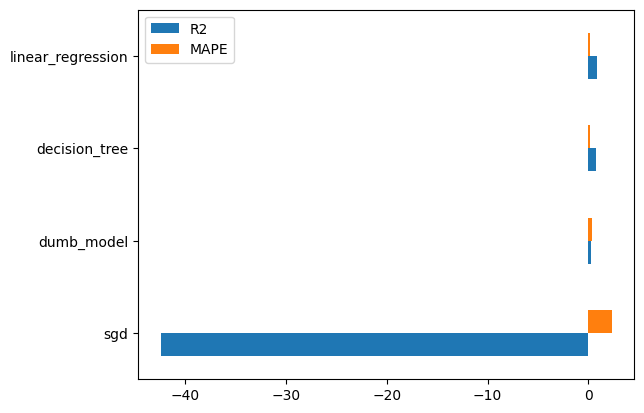

In [56]:
(
    comparing_models_df
    .sort_values(by='R2')
    .plot.barh()
);

Based on the R-squared scores provided, the Linear Regression model stands out as the best performer. A higher R-squared score indicates that the model can explain a larger proportion of the variance in the target labels (y) based on the features (X); meaning it can better capture the underlying relationships between the input features and the target labels, resulting in more accurate predictions.

## 6.&nbsp; Assessing a regression model manually 👀

Beyond examining the individual output metrics from SKLearn, we can gain deeper insights by visualising the calculated differences and plotting them. This approach allows us to evaluate the performance of our regression model more comprehensively.

### 6.1.&nbsp; Histogram of errors

By examining the histogram, we can assess if the errors follow a normal distribution, detect outliers, and identify any skewed data, ultimately aiding us in refining our model and addressing potential issues.

#### 6.1.1.&nbsp; Histogram of errors - dummy model


To construct the histogram, we begin by computing the errors. We expand our train set with two columns: the actual price and the predicted price. By examining the difference between these columns, we can evaluate the errors made by our model.

In [57]:
dummy_errors_df_test = X_test.copy()
dummy_errors_df_test["price"] = y_test
dummy_errors_df_test["prediction"] = dummy_y_test_pred
dummy_errors_df_test["error"] = dummy_errors_df_test["prediction"] - dummy_errors_df_test["price"]

In [58]:
dummy_errors_df = X_train.copy()
dummy_errors_df["price"] = y_train
dummy_errors_df["prediction"] = dummy_y_train_pred
dummy_errors_df["error"] = dummy_errors_df["prediction"] - dummy_errors_df["price"]

In [59]:
dummy_errors_df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,price,prediction,error
1216,1217,90,RM,68.0,8930,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,Duplex,1.5Fin,6,5,1978,1978,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1318,584,0,1902,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1978.0,Unf,2,539,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,112000,266280,154280
1230,1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,NaN,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000,366800,176800
1068,1069,160,RM,42.0,3964,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,6,4,1973,1973,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,837,Unf,0,105,942,GasA,Gd,Y,SBrkr,1291,1230,0,2521,1,0,2,1,5,1,TA,10,Maj1,1,Gd,Attchd,1973.0,Fin,2,576,TA,TA,Y,728,20,0,0,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,151400,352940,201540


Now that we have the error calculated for each row we can plot it.

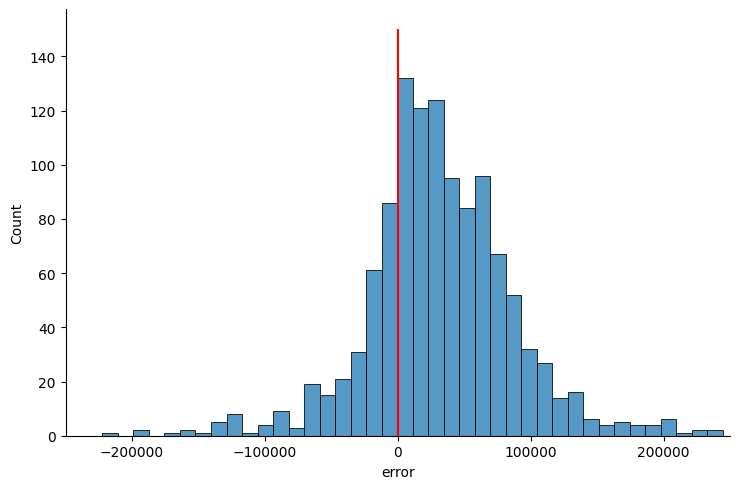

In [60]:
sns.displot(dummy_errors_df['error'],
            aspect=1.5)
plt.vlines(x=0,
           ymin=0,
           ymax=150,
           color='red')
plt.xlim(-250000,
         250000)
plt.show()

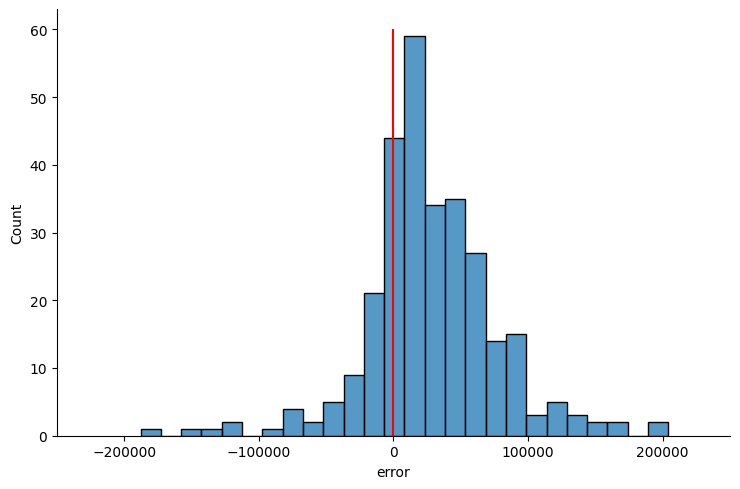

In [61]:
sns.displot(dummy_errors_df_test['error'],
            aspect=1.5)
plt.vlines(x=0,
           ymin=0,
           ymax=60,
           color='red')
plt.xlim(-250000,
         250000)
plt.show()

Our dumb model's predictions exhibit a left-skewed distribution, indicating a consistent tendency to overpredict the house prices. Specifically, there is a prominent peak on the right-hand side, where the model frequently overestimates the price by approximately $20000.

#### 6.1.2.&nbsp; Histogram of errors - decision tree model


In [62]:
dt_errors_df = X_test.copy()
dt_errors_df["price"] = y_test
dt_errors_df["prediction"] = dt_predictions
dt_errors_df["error"] = dt_errors_df["prediction"] - dt_errors_df["price"]

In [63]:
dt_errors_df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,price,prediction,error
258,259,60,RL,80.0,12435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,172.0,Gd,TA,PConc,Gd,TA,No,GLQ,361,Unf,0,602,963,GasA,Ex,Y,SBrkr,963,829,0,1792,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2001.0,RFn,2,564,TA,TA,Y,0,96,0,245,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,231500,196500.0,-35000.0
697,698,20,RL,57.0,6420,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,PConc,Ex,Gd,Mn,LwQ,210,ALQ,551,219,980,GasA,Fa,Y,FuseA,1148,0,0,1148,0,1,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,123500,142000.0,18500.0
1214,1215,85,RL,69.0,10205,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SFoyer,5,5,1962,1962,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,784,Unf,0,141,925,GasA,TA,Y,SBrkr,999,0,0,999,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1962.0,Unf,1,300,TA,TA,Y,150,72,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,134500,123000.0,-11500.0


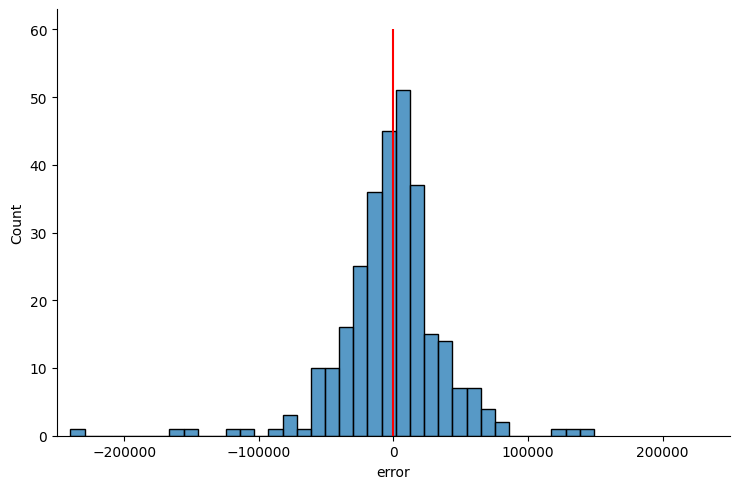

In [64]:
sns.displot(dt_errors_df['error'],
            aspect=1.5)
plt.vlines(x=0,
           ymin=0,
           ymax=60,
           color='red')
plt.xlim(-250000,
         250000)
plt.show()

We can see from our decision tree model that it is much more even handed in its over- and underestimation of the price. Also, there are significantly less large errors here compared to the dummy model.

### 6.2.&nbsp; Scatterplot of errors

A scatterplot can help guide us in a similar manner to a histogram

#### 6.2.1.&nbsp; Scatterplot of errors - dummy model

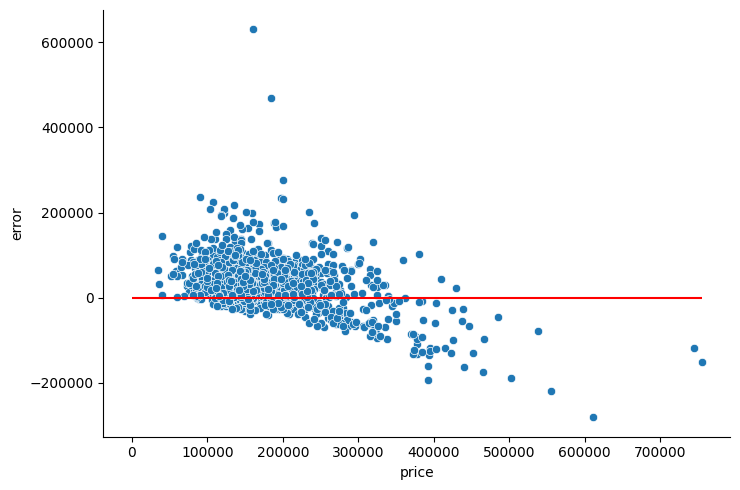

In [65]:
sns.relplot(data=dummy_errors_df,
            x='price',
            y='error',
            aspect=1.5)
plt.hlines(y=0,
           xmin=0,
           xmax=max(dummy_errors_df['price']),
           color='red')
plt.show()

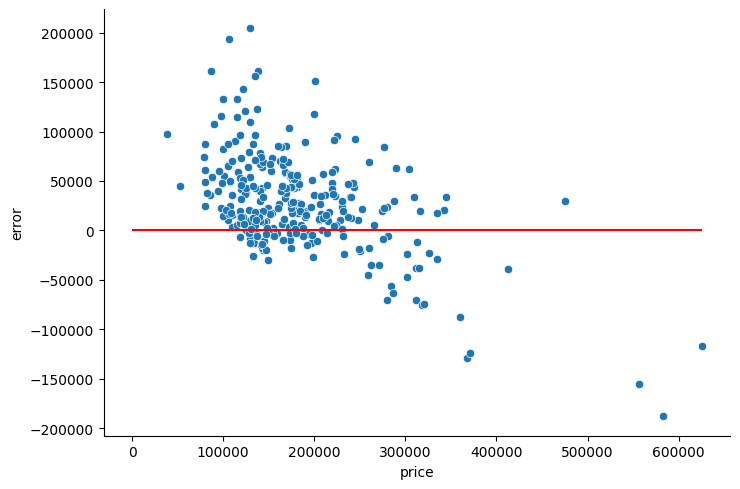

In [66]:
sns.relplot(data=dummy_errors_df_test,
            x='price',
            y='error',
            aspect=1.5)
plt.hlines(y=0,
           xmin=0,
           xmax=max(dummy_errors_df_test['price']),
           color='red')
plt.show()

We can see how worse our model is at predicting the price.

#### 6.2.1.&nbsp; Scatterplot of errors - decision tree model

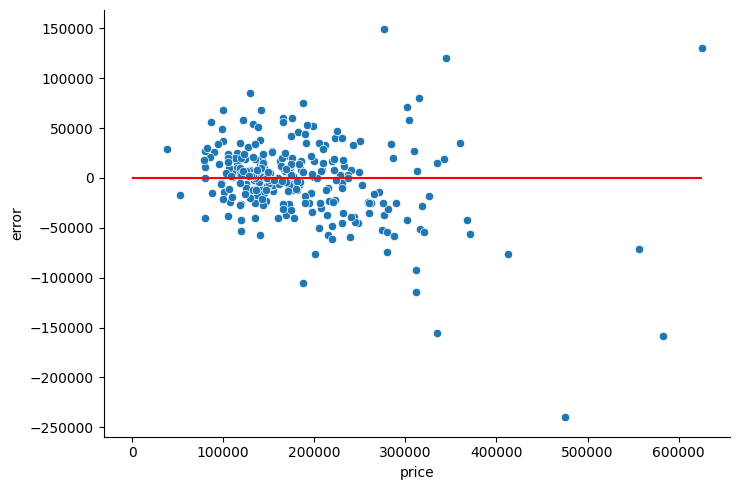

In [67]:
sns.relplot(data=dt_errors_df,
            x='price',
            y='error',
            aspect=1.5)
plt.hlines(y=0,
           xmin=0,
           xmax=max(dt_errors_df['price']),
           color='red')
plt.show()

From the y-axis range, it is evident that the decision tree performs better in predicting the price overall. The increased symmetry in the plot indicates that the model is not solely overpredicting or underpredicting, showing a balanced performance. However, the model still struggles with predicting prices for expensive houses. Remember, all models are wrong, but some are useful. 